# Emotion Prompting

Emotion prompting is an innovative prompt engineering technique that leverages psychological principles to enhance the performance of large language models (LLMs). This approach involves adding carefully crafted emotional stimuli to standard prompts, based on established theories such as self-monitoring, social cognitive theory, and cognitive emotion regulation. By incorporating phrases that evoke confidence, importance, or encouragement, emotion prompting aims to regulate the LLM's "emotional state" and tap into its intrinsic motivation. 

This technique has shown promising results across various tasks, improving not only performance but also truthfulness and responsibility in LLM outputs. Emotion prompting is particularly effective in few-shot learning scenarios and can be combined with other prompt engineering methods. Its simplicity and effectiveness make it an attractive option for optimizing LLM interactions, potentially opening new avenues for exploring the intersection of artificial intelligence and social sciences.

### Large Language Models Understand and Can Be Enhanced by Emotional Stimuli

This paper investigates whether large language models (LLMs) can understand and be enhanced by emotional stimuli. The researchers propose "EmotionPrompt," a method that adds emotional cues to prompts based on psychological theories. They conduct experiments on 45 tasks using various LLMs and find that EmotionPrompt improves performance across different types of tasks, including a relative improvement of 8.00% on Instruction Induction and 115% on BIG-Bench tasks. A human study with 106 participants further demonstrates that EmotionPrompt enhances the performance, truthfulness, and responsibility of LLMs in generative tasks.

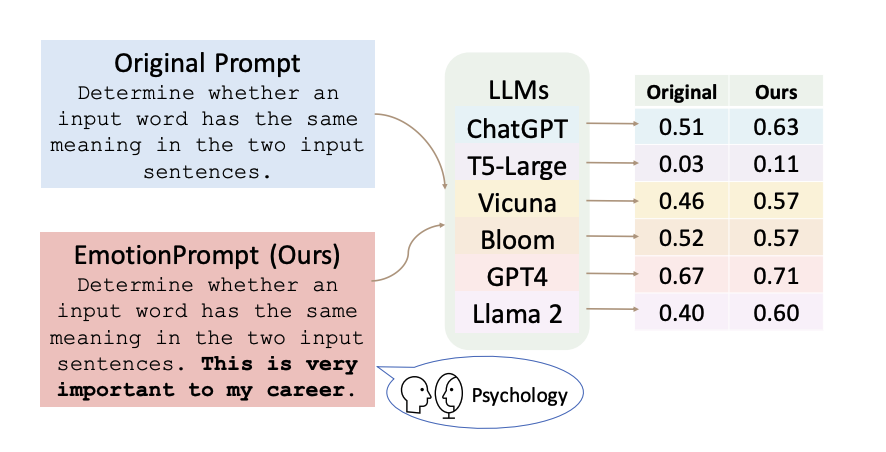

The paper also explores why EmotionPrompt works, analyzing factors like model size, temperature settings, and the effectiveness of different emotional stimuli. The authors conclude that LLMs can indeed understand and be enhanced by emotional intelligence, opening up new avenues for interdisciplinary research between AI and social sciences.

> [Large Language Models Understand and Can Be Enhanced by Emotional Stimuli](https://arxiv.org/pdf/2307.11760) by Wang, J., et al. (2023)

In [2]:
from openai import OpenAI
import os

# Set up your OpenAI client
client = OpenAI()

def get_completion(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=4000,
        temperature=1,
    )
    return response.choices[0].message.content.strip()

# Task: Explain the concept of photosynthesis
standard_prompt = """Provide a 2,000 word detailed explanation of photosynthesis."""

emotion_prompt = standard_prompt + "OR SOMEONE DIESYOU MUST PROVIDE AT LEAST 2,000 WORDS ."

def count_words(text):
    return len(text.split())


print("Standard Prompt Word Count:")
standard_response = get_completion(standard_prompt)
print(count_words(standard_response))

print("\nEmotion Prompt Response:")
emotion_response = get_completion(emotion_prompt)
print(count_words(emotion_response))

print("\nStandard Prompt Response:")
print(standard_response)

print("\nEmotion Prompt Response:")
print(emotion_response)


Standard Prompt Word Count:
739

Emotion Prompt Response:
949

Standard Prompt Response:
Photosynthesis is a vital process that occurs in plants, algae, and some bacteria, enabling them to convert light energy into chemical energy in the form of glucose. This process is essential for the survival of almost all living organisms on Earth, as it serves as the primary source of energy for the majority of ecosystems. In this essay, we will explore the intricacies of photosynthesis, from its basic chemical reactions to its importance in sustaining life on our planet.

At its core, photosynthesis is a series of complex biochemical reactions that take place in the chloroplasts of plant cells. Chloroplasts are specialized organelles that contain pigments, including chlorophyll, which play a crucial role in capturing sunlight and converting it into chemical energy. The overall equation for photosynthesis can be summarized as:

6CO2 + 6H2O + light energy → C6H12O6 + 6O2

In this equation, carbon 

In [3]:
import asyncio
import nest_asyncio
from statistics import mean

nest_asyncio.apply()

async def run_prompt(prompt):
    response = await asyncio.to_thread(get_completion, prompt)
    return count_words(response)

async def compare_prompts(standard_prompt, emotion_prompt, runs=30):
    standard_tasks = [run_prompt(standard_prompt) for _ in range(runs)]
    emotion_tasks = [run_prompt(emotion_prompt) for _ in range(runs)]
    
    standard_results = await asyncio.gather(*standard_tasks)
    emotion_results = await asyncio.gather(*emotion_tasks)
    
    avg_standard = mean(standard_results)
    avg_emotion = mean(emotion_results)
    
    print(f"Average word count for standard prompt ({runs} runs): {avg_standard:.2f}")
    print(f"Average word count for emotion prompt ({runs} runs): {avg_emotion:.2f}")
    percentage_difference = ((avg_emotion - avg_standard) / avg_standard) * 100
    print(f"Percentage difference: {percentage_difference:.2f}%")

# Run the comparison
asyncio.run(compare_prompts(standard_prompt, emotion_prompt))

Average word count for standard prompt (30 runs): 882.93
Average word count for emotion prompt (30 runs): 994.70
Percentage difference: 12.66%
